In [27]:
# cargar las librerias necesarias

import pandas as pd # Manejo y analisis de estructura de datos
import numpy as np # Cálculo númerico y el analisis de datos 
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de graficos en dos dimesnsiones 

# Librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 

In [31]:
#Lectura de datos en python y lo cargamos en la variable Datos

Datos = pd.read_csv('C:/Users/LAURA/Downloads/ANALISIS_DE_DATOS/Tarea_3/heart_cleveland_upload.csv')

In [ ]:
1) Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc. 

In [39]:
# Realizamos Lectura de los Datos para el analisis exploratorio

Datos.head(298)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [37]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atipicos')

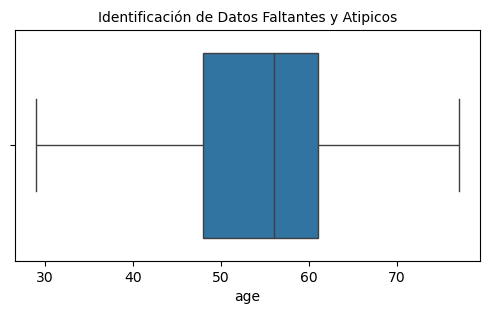

In [65]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['age'])
plt.title('Identificación de Datos Faltantes y Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atipicos')

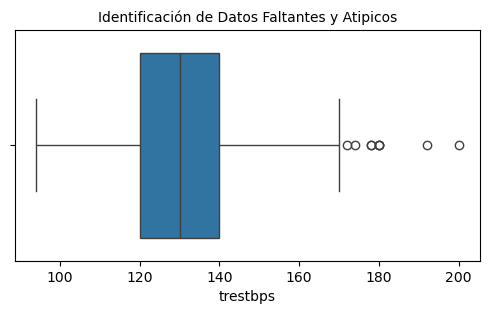

In [47]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atipicos')

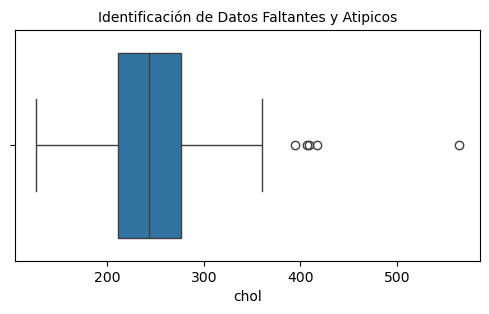

In [61]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atipicos')

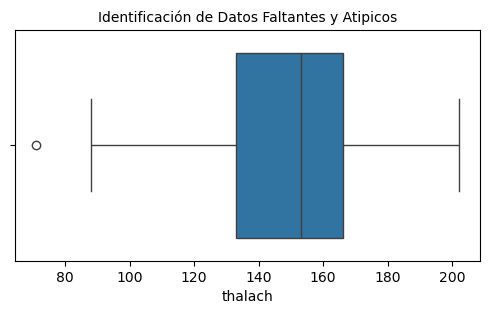

In [63]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Faltantes y Atipicos', fontsize=10 )

In [ ]:
2) Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario. 

In [67]:
#Revisión de Datos faltantes

print("Cantidad de Registros con cero en Pesión Arterial: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol Serico: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Cardiaca: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresión del Segmento: ",Datos['oldpeak'].isin([0]).sum())

Cantidad de Registros con cero en Pesión Arterial:  0
Cantidad de Registros con cero en Colesterol Serico:  0
Cantidad de Registros con cero en Frecuencia Cardiaca:  0
Cantidad de Registros con cero en Depresión del Segmento:  96


In [77]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())

In [75]:
#Revisión Nuevamente de Datos faltantes

print("Cantidad de Registros con cero en Pesión Arterial: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol Serico: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Cardiaca: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresión del Segmento: ",Datos['oldpeak'].isin([0]).sum())

Cantidad de Registros con cero en Pesión Arterial:  0
Cantidad de Registros con cero en Colesterol Serico:  0
Cantidad de Registros con cero en Frecuencia Cardiaca:  0
Cantidad de Registros con cero en Depresión del Segmento:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

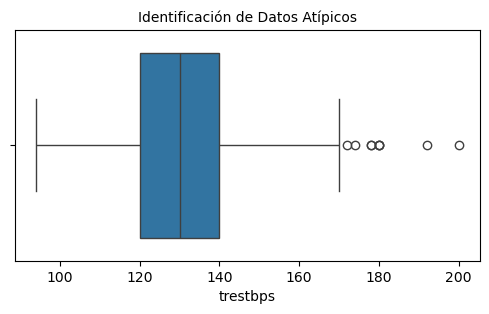

In [79]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Atípicos', fontsize=10)

In [88]:
#Conteo de Datos Atípicos

nivel_minimo=80
nivel_maximo=155
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 28


In [90]:
# Filtar Datos Atípicos

Datos=Datos[(Datos['trestbps']<nivel_maximo)&(Datos['trestbps']>nivel_minimo)]

In [92]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [94]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 1 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        268 non-null    int64  
 1   sex        268 non-null    int64  
 2   cp         268 non-null    int64  
 3   trestbps   268 non-null    int64  
 4   chol       268 non-null    int64  
 5   fbs        268 non-null    int64  
 6   restecg    268 non-null    int64  
 7   thalach    268 non-null    int64  
 8   exang      268 non-null    int64  
 9   oldpeak    268 non-null    float64
 10  slope      268 non-null    int64  
 11  ca         268 non-null    int64  
 12  thal       268 non-null    int64  
 13  condition  268 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.4 KB


In [ ]:
3) Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características.

In [ ]:
Caracteristica de interes

* Enfermedad Cardiaca: si la persona tiene presencia de enfermedad cardiaca o no (0 = sin enfermedad cardiaca- 1 = con enfermedad cardiaca)
* Predecir si una persona puede tener presencia de enfermedad cardiaca

In [97]:
# Total de personas con  presencia de enfermedad cardiaca

Datos['condition'].value_counts()

condition
0    149
1    119
Name: count, dtype: int64

In [99]:
Datos[['condition']].head(298)

,condition
1,0
2,0
3,1
4,0
6,0
...,...
292,1
293,1
294,1
295,0


In [ ]:
4) Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [ ]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables L y M para almacenar la información del entrenamiento

L=Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition
M=Datos['condition'] # Se cargan los datos de train con los datos de la columna condition

#La función train_test_split crea una división de un conjutno de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
L_train, L_test, M_train, M_test = train_test_split(L, M, test_size=0.25, stratify=M, random_state=0)


In [122]:
print (L_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
59    44    1   1       120   263    0        0      173      0  1.055556   
180   63    0   3       150   407    0        2      154      0  4.000000   
32    58    0   1       136   319    1        2      152      0  1.055556   
87    64    1   2       140   335    0        0      158      0  1.055556   
254   53    1   3       142   226    0        2      111      1  1.055556   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
277   45    1   3       142   309    0        2      147      1  1.055556   
145   42    0   2       120   209    0        0      173      0  1.055556   
39    56    1   1       130   221    0        2      163      0  1.055556   
88    64    0   2       140   313    0        0      133      0  0.200000   
67    41    0   1       126   306    0        0      163      0  1.055556   

     slope  ca  thal  
59       0   0     2  
180      1   3     2  
32    

In [124]:
print (M_train)

59     0
180    1
32     1
87     1
254    0
      ..
277    1
145    0
39     0
88     0
67     0
Name: condition, Length: 201, dtype: int64


In [ ]:
5) Entrenar el modelo configurando los diferentes hiperparámetros.

In [134]:
# Construir el modelo de regresión logistica 

modelo_regresion=LogisticRegression(solver="liblinear") # liblinear es una libreria para resolver probelmas lineales de clasificación y regresión
modelo_regresion.fit (L_train , M_train)

# Crea el modelo de prediccion
Predicion=modelo_regresion.predict(L_test) # La función predict predice los valores a partir del conjunto de datos de la validación

In [136]:
print (M_test)

283    1
192    1
280    1
213    1
251    0
      ..
108    0
249    0
57     0
27     0
82     0
Name: condition, Length: 67, dtype: int64


In [138]:
print (Predicion)

[1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0]


In [ ]:
6) Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [140]:
# Desempeño del modelo de regresión

print(classification_report(M_test,Predicion))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        37
           1       0.93      0.83      0.88        30

    accuracy                           0.90        67
   macro avg       0.90      0.89      0.89        67
weighted avg       0.90      0.90      0.89        67



In [ ]:
7) Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

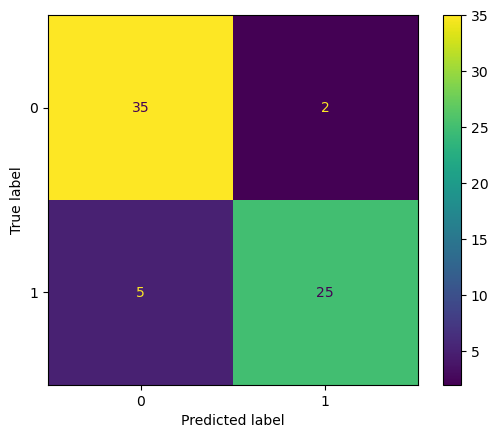

In [142]:
# Matrix de confusión del modelo 

cm=confusion_matrix(M_test,Predicion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

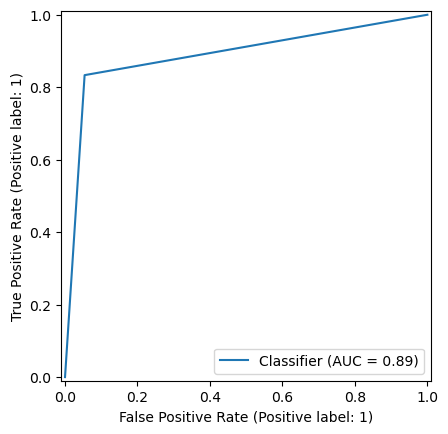

In [144]:
# Curva de precisión del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(M_test, Predicion)
plt.show()

In [ ]:
8) Interpretar, analizar y documentar los resultados obtenidos.

In [ ]:
*En el Desempeño del Modelo se describe que:
-Precisión: Esta mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo; 
en la presencia de Enfermedad Cardiaca esta precisión es de 0,90, esto significa que el 90% de los predichos con enfermedad cardiaca en el modelo
tenian esta enfermedad.
-Recall: Aqui se mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en este conjunto de datos.
En este recall para la clase de presencia de enfermedad cardiaca es 0,83 y esto nos indica que el 83% esta correctamente identificado en el modelo
de todas las personas con esta enfermedad.
-F1 Score: En esta media armonica de precisión y recuperación, nos proporciona una puntuación unica que equilibra la precisión y recall.
La puntuación F1 Score para la clase de enfermedad cardiaca es 0,88, esto nos indica el equilibrio entre precisión y recuerdo.

In [ ]:
*En la Matrix de Confusión :
El modelo de 35 veces que dijo que una persona no tenia presencia de enfermedad cardiaca siertamente no tenia la enfermedad, por el contrario
el modelo dijo que 5 veces que una persona no tendria enfermedad cardiaca pero en realidad si iba a tener la enfermedad, por lo que acerto 
35 veces y erro 5; El modelo dijo que 25 veces la persona tiene presencia de enfermedad cardiaca y siertamente 25 veces la persona si tiene la
enfermedad; El modelo dijo que 2 veces la persona tendria presencia de enfermedad cardiaca pero erro porque no tenian la enfermedad.

In [ ]:
*En la Curva de Precisión del Modelo:
Se interpreta que el AUC es 0,89, esto significa que el 89% de las predicciones del clasificador son correctas en todos los umbrales de
clasificación.